<a href="https://colab.research.google.com/github/tantai17132002/thuat_toan_toi_uu_khdl/blob/main/GD_tai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [33]:
df = pd.read_csv('data.csv', header = None )
df

,0,1
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


Biểu diễn dl lên đồ thị

<AxesSubplot:xlabel='0', ylabel='1'>

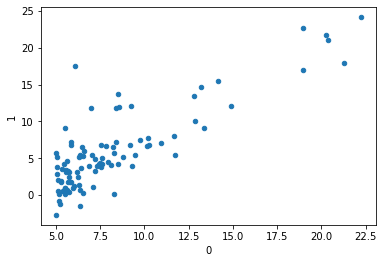

In [34]:
df.plot.scatter(x=0, y=1)


Tối ưu cho bài toán hồi quy tuyến tính đơn biến trên bằng GD.

In [41]:
scaler = MinMaxScaler()
df['X'] = scaler.fit_transform(df[[0]])
df['Y'] = scaler.fit_transform(df[[1]])

In [42]:
#Thiết lập mô hình
X = df['X'].values.reshape(-1, 1)
y = df['Y'].values.reshape(-1, 1)

# Thêm cột 1 vào ma trận X để tương đương với hệ số w0
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Khởi tạo các tham số cho mô hình
w = np.zeros((X.shape[1], 1))  # Khởi tạo w bằng ma trận 0
learning_rate = 0.01  # Tốc độ học
num_iterations = 1000  # Số lần lặp

In [43]:
for i in range(num_iterations):
    # Tính đầu ra dự đoán
    y_pred = np.dot(X, w)
    
    # Tính độ lỗi (cost)
    cost = np.sum(np.square(y_pred - y)) / (2 * y.shape[0])
    
    # Tính gradient và cập nhật tham số
    gradient = np.dot(X.T, (y_pred - y)) / y.shape[0]
    w -= learning_rate * gradient
    
    # In thông tin độ lỗi sau mỗi lần lặp
    if i % 100 == 0:
      print(f'Step {i}: Cost = {cost}')

Step 0: Cost = 0.07130326820628229
Step 100: Cost = 0.024099684731157506
Step 200: Cost = 0.017304086635822596
Step 300: Cost = 0.0156365726677454
Step 400: Cost = 0.014685056336648444
Step 500: Cost = 0.013891715923071693
Step 600: Cost = 0.013180546743555984
Step 700: Cost = 0.012536283454885815
Step 800: Cost = 0.011951778040732308
Step 900: Cost = 0.011421380986658469


In [44]:
for i in range(num_iterations):
    # Tính đầu ra dự đoán
    y_pred = np.dot(X, w)
    
    # Tính độ lỗi (cost)
    cost = np.sum(np.square(y_pred - y)) / (2 * y.shape[0])
    
    # Tính gradient và cập nhật tham số
    gradient = np.dot(X.T, (y_pred - y)) / y.shape[0]
    w -= learning_rate * gradient
    
    # In thông tin độ lỗi sau mỗi lần lặp
    if i % 100 == 0:
      print(f'Step {i}: Cost = {cost}')

Step 0: Cost = 0.010940070088477624
Step 100: Cost = 0.010503300951960256
Step 200: Cost = 0.010106951358955176
Step 300: Cost = 0.009747280773127252
Step 400: Cost = 0.009420894840415065
Step 500: Cost = 0.009124713330402053
Step 600: Cost = 0.008855941063898108
Step 700: Cost = 0.008612041533369141
Step 800: Cost = 0.008390712964889071
Step 900: Cost = 0.008189866595405623


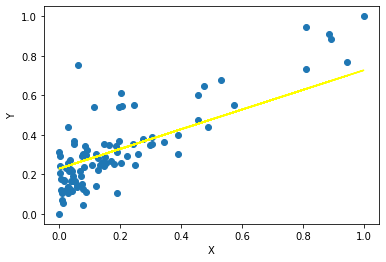

In [47]:
import matplotlib.pyplot as plt

plt.scatter(df['X'], df['Y'])
plt.plot(df['X'], np.dot(X, w), color='yellow')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()